In [96]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
%matplotlib inline
# Import API key
from api_keys import g_key


In [97]:
electricity_generated=pd.read_csv('../Data/US_Nuclear_Generating_Stats_1971-2019.csv')
electricity_generated

,YEAR,TOTAL ELECTRICITY GENERATION (MWH),NUCLEAR GENERATION (MWH),NUCLEAR FUEL SHARE (PERCENT),CAPACITY FACTOR (PERCENT),SUMMER CAPACITY (MW)
0,1971,"1,615,853,616","38,104,545",2.4,48.2,"9,033"
1,1972,"1,752,978,413","54,091,135",3.1,42.5,"14,481"
2,1973,"1,864,056,631","83,479,463",4.5,53.5,"22,683"
3,1974,"1,870,319,405","113,975,740",6.1,47.8,"31,867"
4,1975,"1,920,754,569","172,505,075",9.0,55.9,"37,267"
5,1976,"2,040,913,681","191,103,531",9.4,54.7,"43,822"
6,1977,"2,127,447,487","250,883,283",11.8,63.3,"46,303"
7,1978,"2,209,376,911","276,403,070",12.5,64.5,"50,824"
8,1979,"2,250,665,025","255,154,623",11.3,58.4,"49,747"
9,1980,"2,289,600,364","251,115,575",11.0,56.3,"51,810"


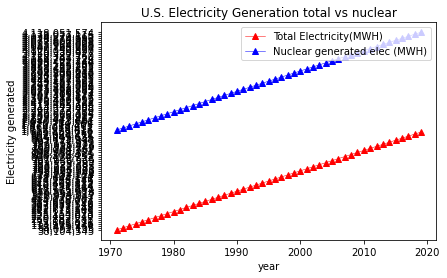

In [98]:
x_axis=electricity_generated['YEAR']
y1=electricity_generated['NUCLEAR GENERATION (MWH)']
y2=electricity_generated['TOTAL ELECTRICITY GENERATION (MWH)']

plt.plot(x_axis,y1,linewidth=0.5, marker='^', color='r',label="Total Electricity(MWH)")
plt.plot(x_axis,y2,linewidth=0.5, marker='^', color='b', label="Nuclear generated elec (MWH)")

plt.rcParams["figure.figsize"] = [20, 20]
plt.title("U.S. Electricity Generation total vs nuclear")
plt.xlabel("year")
plt.ylabel("Electricity generated")
plt.legend(loc='upper right')
#plt.ylim(38000000,4300000000)
plt.savefig("../Figures/U.S. Electricity Generation(Total VS Nuclear).png")
plt.show()

In [99]:
energy_stats=pd.read_excel('../Data/U.S. Electricity Generation Fuel Shares.xlsx')
energy_stats.head()


,Year,Coal (%),Petroleum (%),Natural Gas (%),Other Gases (%),Nuclear (%),Hydro (%),Wood (%),Waste (%),Geothermal (%),Solar - PV (%),Wind (%)
0,1949,45.7,9.6,12.5,-,0.0,32.0,0.1,-,-,-,-
1,1950,46.3,10.1,13.3,-,0.0,30.2,0.1,-,-,-,-
2,1951,49.3,7.7,15.1,-,0.0,27.8,0.1,-,-,-,-
3,1952,48.4,7.4,17.0,-,0.0,27.2,0.1,-,-,-,-
4,1953,49.0,8.6,17.8,-,0.0,24.5,0.1,-,-,-,-


In [101]:
energy_stats.describe()

,Year,Coal (%),Petroleum (%),Natural Gas (%),Nuclear (%),Hydro (%),Wood (%)
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,1984.000000,48.504225,5.991549,18.821127,11.433803,13.222535,0.452113
std,20.639767,6.976889,4.592781,6.244401,8.596111,6.589346,0.501671
min,1949.000000,23.500000,0.500000,9.300000,0.000000,5.600000,0.000000
25%,1966.500000,45.800000,2.800000,14.300000,0.550000,7.350000,0.000000
50%,1984.000000,50.800000,5.500000,17.800000,13.500000,11.500000,0.100000
75%,2001.500000,52.950000,7.550000,21.800000,19.500000,17.900000,1.000000
max,2019.000000,56.900000,16.900000,38.400000,20.600000,32.000000,1.200000


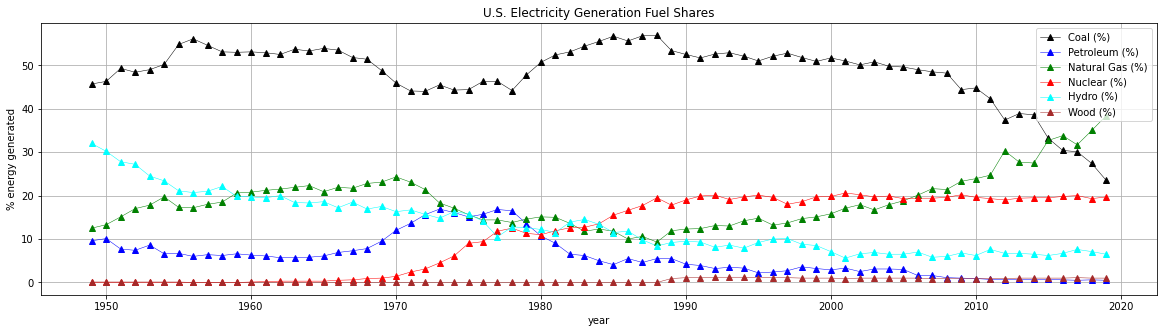

In [82]:
x_axis=energy_stats['Year']
y1=energy_stats['Coal (%)']
y2=energy_stats['Petroleum (%)']
y3=energy_stats['Natural Gas (%)']
y4=energy_stats['Nuclear (%)']
y5=energy_stats['Hydro (%)']
y6=energy_stats['Wood (%)']
plt.plot(x_axis,y1,linewidth=0.5, marker='^', color='black',label="Coal (%)")
plt.plot(x_axis,y2,linewidth=0.5, marker='^', color='b', label="Petroleum (%)")
plt.plot(x_axis,y3,linewidth=0.5, marker='^', color='g', label="Natural Gas (%)")
plt.plot(x_axis,y4,linewidth=0.5, marker='^', color='r', label="Nuclear (%)")
plt.plot(x_axis,y5,linewidth=0.5, marker='^', color='aqua', label="Hydro (%)")
plt.plot(x_axis,y6,linewidth=0.5, marker='^', color='brown', label="Wood (%)")
plt.rcParams["figure.figsize"] = [20, 5]
plt.title("U.S. Electricity Generation Fuel Shares")
plt.xlabel("year")
plt.ylabel("% energy generated")
plt.legend(loc='upper right')
plt.grid()
plt.savefig("../Figures/U.S. Electricity Generation Fuel Shares.png")
plt.show()

In [128]:
energy2019=energy_stats[energy_stats['Year']==2019]
energy2019.set_index("Year",inplace=True)
energy1970=energy_stats[energy_stats['Year']==1970]
energy1970.set_index("Year",inplace=True)
energy1970

,Coal (%),Petroleum (%),Natural Gas (%),Other Gases (%),Nuclear (%),Hydro (%),Wood (%),Waste (%),Geothermal (%),Solar - PV (%),Wind (%)
Year,,,,,,,,,,,
1970,45.9,12.0,24.3,-,1.4,16.3,0.0,0.0,0.0,-,-


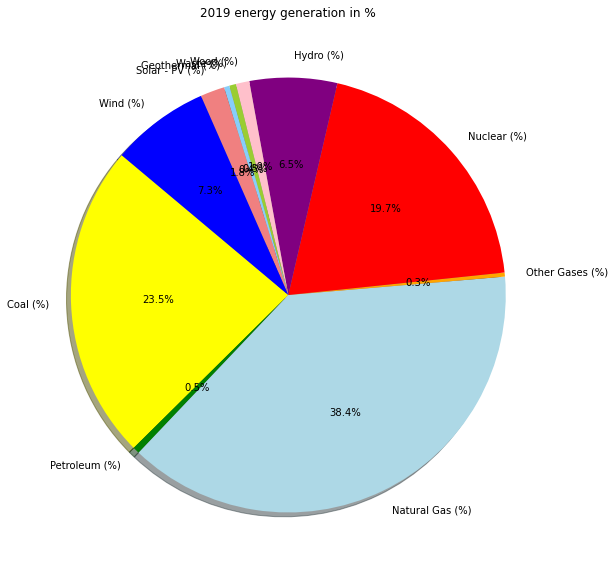

In [126]:
labels=['Coal (%)', 'Petroleum (%)', 'Natural Gas (%)',
       'Other Gases (%)', 'Nuclear (%)', 'Hydro (%)', 'Wood (%)', 'Waste (%)',
       'Geothermal (%)', 'Solar - PV (%)', 'Wind (%)']
coal=23.5
petro=0.5
gas=38.4
other_gas=0.3
Nuclear=19.7
hydro=6.5
wood=1
waste=0.5
solar=1.8
wind=7.3

colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral","blue"]
pie_values=[23.5,0.5,38.4,0.3,19.7,6.5,1.0,0.5,0.4,1.8,7.3]
plt.pie(pie_values, labels=labels,autopct="%1.1f%%",colors=colors, shadow=True, startangle=140)

plt.title("2019 energy generation in %")
plt.rcParams["figure.figsize"] = [10, 10]
#plt.tight_layout()
plt.show()

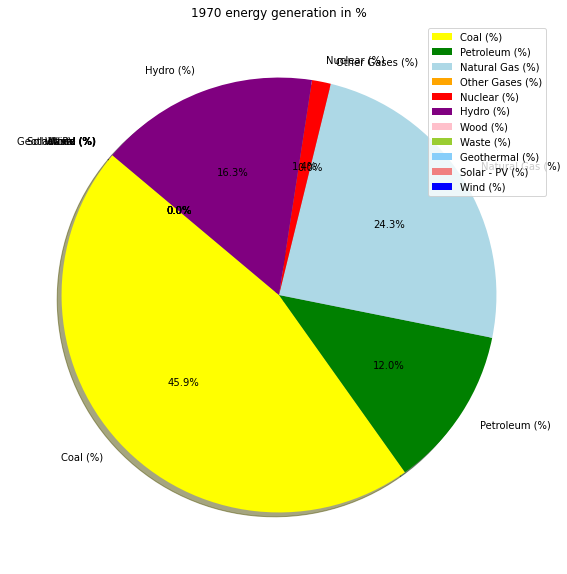

In [131]:
labels=['Coal (%)', 'Petroleum (%)', 'Natural Gas (%)',
       'Other Gases (%)', 'Nuclear (%)', 'Hydro (%)', 'Wood (%)', 'Waste (%)',
       'Geothermal (%)', 'Solar - PV (%)', 'Wind (%)']
coal=23.5
petro=0.5
gas=38.4
other_gas=0.3
Nuclear=19.7
hydro=6.5
wood=1
waste=0.5
solar=1.8
wind=7.3

colors = ["yellow","green","lightblue","orange","red","purple","pink","yellowgreen","lightskyblue","lightcoral","blue"]
pie_values=[45.9,12.0,24.3,0,1.4,16.3,0,0,0,0,0]
plt.pie(pie_values, labels=labels,autopct="%1.1f%%",colors=colors, shadow=True, startangle=140)
plt.legend(labels)
plt.title("1970 energy generation in %")
plt.rcParams["figure.figsize"] = [10, 10]
#plt.tight_layout()
plt.show()

In [46]:
usreact20=pd.read_excel('../Data/usreact20.xlsx')
usreact20.columns

Index(['State', 'Plant ID', 'Name', 'Unit ID', 'January(Megawatthours)',
       'February(Megawatthours)', 'MarchMegawatthours()',
       'April(Megawatthours)', 'May(Megawatthours)', 'JuneMegawatthours()',
       'Total(Megawatthours)', 'Current Capacity (MWe) Nameplate',
       'Current Capacity (MWe) Summer',
       '% of summer capacity Utilization Factor'],
      dtype='object')

In [52]:
reactorlatlong=pd.read_csv('../Data/Reactors.csv')
#reactorlatlong

In [53]:
usreact20_reactlatlong=usreact20.merge(reactorlatlong,how='left',on=['Name',"State"])
usreact20_reactlatlong

,State,Plant ID,Name,Unit ID,January(Megawatthours),February(Megawatthours),MarchMegawatthours(),April(Megawatthours),May(Megawatthours),JuneMegawatthours(),Total(Megawatthours),Current Capacity (MWe) Nameplate,Current Capacity (MWe) Summer,% of summer capacity Utilization Factor,Number of units,City,Lat,Long,Open,License Expires
0,AL,46,Browns Ferry Nuclear Plant,1,894145,841584,923782,899025,930166,895460,5384162,1152,1256,98.2,3,Athens,34.812790,-86.961891,1973,2033
1,AL,46,Browns Ferry Nuclear Plant,2,929696,848772,925678,901137,714040,648685,4968008,1152,1259,90.4,3,Athens,34.812790,-86.961891,1973,2033
2,AL,46,Browns Ferry Nuclear Plant,3,834668,565007,75329,710055,952015,902404,4039478,1190,1260,73.4,3,Athens,34.812790,-86.961891,1973,2033
3,AL,6001,Farley,1,667900,624092,663648,642372,661439,634760,3894211,888,874,102,2,Columbia,33.543098,-86.879112,1977,2037
4,AL,6001,Farley,2,668416,624755,663299,619763,662327,635641,3874201,888,877,101.1,2,Columbia,33.543098,-86.879112,1977,2037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,VA,3806,Surry,1,649115,604982,642762,618337,643121,608692,3767009,848,838,102.9,2,Surry,37.138279,-76.834991,1972,2032
92,VA,3806,Surry,2,648762,603182,645305,572847,32065,524151,3026312,848,838,82.7,2,Surry,37.138279,-76.834991,1972,2032
93,WA,371,Columbia Generating Station,2,861324,724803,853818,835101,788141,420416,4483603,1200,1163,88.3,1,Richland,46.280418,-119.275200,1984,2043
94,WI,4046,Point Beach,1,446502,417798,446677,430083,447859,431990,2620909,643,598,100.3,2,Two Rivers,44.153648,-87.568367,1970,2030


In [54]:
usreact20_reactlatlong.columns

Index(['State', 'Plant ID', 'Name', 'Unit ID', 'January(Megawatthours)',
       'February(Megawatthours)', 'MarchMegawatthours()',
       'April(Megawatthours)', 'May(Megawatthours)', 'JuneMegawatthours()',
       'Total(Megawatthours)', 'Current Capacity (MWe) Nameplate',
       'Current Capacity (MWe) Summer',
       '% of summer capacity Utilization Factor', 'Number of units', 'City',
       'Lat', 'Long', 'Open', 'License Expires'],
      dtype='object')

In [55]:
enerry_stat2020=usreact20_reactlatlong[[ 'Plant ID', 'Name', 'City','State','Lat', 'Long', 'Open', 'January(Megawatthours)',
       'February(Megawatthours)', 'MarchMegawatthours()',
       'April(Megawatthours)', 'May(Megawatthours)', 'JuneMegawatthours()',
       'Total(Megawatthours)', 'Current Capacity (MWe) Nameplate',
       'Current Capacity (MWe) Summer',
       '% of summer capacity Utilization Factor']].copy()

In [56]:
enerry_stat2020

,Plant ID,Name,City,State,Lat,Long,Open,January(Megawatthours),February(Megawatthours),MarchMegawatthours(),April(Megawatthours),May(Megawatthours),JuneMegawatthours(),Total(Megawatthours),Current Capacity (MWe) Nameplate,Current Capacity (MWe) Summer,% of summer capacity Utilization Factor
0,46,Browns Ferry Nuclear Plant,Athens,AL,34.812790,-86.961891,1973,894145,841584,923782,899025,930166,895460,5384162,1152,1256,98.2
1,46,Browns Ferry Nuclear Plant,Athens,AL,34.812790,-86.961891,1973,929696,848772,925678,901137,714040,648685,4968008,1152,1259,90.4
2,46,Browns Ferry Nuclear Plant,Athens,AL,34.812790,-86.961891,1973,834668,565007,75329,710055,952015,902404,4039478,1190,1260,73.4
3,6001,Farley,Columbia,AL,33.543098,-86.879112,1977,667900,624092,663648,642372,661439,634760,3894211,888,874,102
4,6001,Farley,Columbia,AL,33.543098,-86.879112,1977,668416,624755,663299,619763,662327,635641,3874201,888,877,101.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,3806,Surry,Surry,VA,37.138279,-76.834991,1972,649115,604982,642762,618337,643121,608692,3767009,848,838,102.9
92,3806,Surry,Surry,VA,37.138279,-76.834991,1972,648762,603182,645305,572847,32065,524151,3026312,848,838,82.7
93,371,Columbia Generating Station,Richland,WA,46.280418,-119.275200,1984,861324,724803,853818,835101,788141,420416,4483603,1200,1163,88.3
94,4046,Point Beach,Two Rivers,WI,44.153648,-87.568367,1970,446502,417798,446677,430083,447859,431990,2620909,643,598,100.3


In [62]:
eachreactor_energy=enerry_stat2020.groupby(["Name","City","State"])
eachreactor_energy_df=pd.DataFrame()
eachreactor_energy_df['Total energy generated(Megawatthours)']=eachreactor_energy['Total(Megawatthours)'].sum()
eachreactor_energy_df['Reactor lat']=eachreactor_energy['Lat'].mean()
eachreactor_energy_df['Reactor long']=eachreactor_energy['Long'].mean()

eachreactor_energy_df.reset_index(inplace=True)
eachreactor_energy_df

,Name,City,State,Total energy generated(Megawatthours),Reactor lat,Reactor long
0,Arkansas Nuclear One,London,AR,7069289,35.330898,-93.247162
1,Beaver Valley Power Station,Shippingport,PA,7409222,40.629372,-80.421249
2,Braidwood Station,Braceville,IL,9898478,41.226929,-88.264282
3,Browns Ferry Nuclear Plant,Athens,AL,14391648,34.812790,-86.961891
4,Brunswick Steam Electric Plant,Southport,NC,7246324,33.921562,-78.020271
5,Byron Station,Byron,IL,9678413,42.125408,-89.255959
6,Callaway Plant,Fulton,MO,5214289,38.844391,-91.944656
7,Calvert Cliffs Nuclear Power Plant,Lusby,MD,7264444,38.351631,-76.436172
8,Catawba Nuclear Station,York,SC,9164474,34.994110,-81.241982
9,Clinton Power Station,Clinton,IL,4709306,40.148060,-88.963928


In [93]:
eachreactor_energy_df['Total energy generated(Megawatthours)'].describe()

count    5.700000e+01
mean     6.927450e+06
std      3.011665e+06
min      1.833686e+06
25%      4.483603e+06
50%      7.264444e+06
75%      9.164474e+06
max      1.588391e+07
Name: Total energy generated(Megawatthours), dtype: float64

In [95]:
eachreactor_energy_df['Total energy generated(Megawatthours)'].mean()

6927450.157894737

* Average energy generated by nuclear reactors in 2020 is 6927450.157894737

In [58]:
# Configure gmaps
gmaps.configure(api_key=g_key)

energy = eachreactor_energy_df["Total energy generated(Megawatthours)"]
maxenergy = energy.max()
locations = eachreactor_energy_df[["Reactor lat", "Reactor long"]]

In [59]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=energy,dissipating=False, max_intensity=maxenergy,point_radius=3)

# Add layer
fig.add_layer(heat_layer)
# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [63]:
# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Reactor Name</dt><dd>{Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>State</dt><dd>{State}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
reactor_info = [info_box_template.format(**row) for index, row in eachreactor_energy_df.iterrows()]
locations = eachreactor_energy_df[["Reactor lat", "Reactor long"]]

In [64]:
## add markers
markerLayer = gmaps.marker_layer(locations, info_box_content = reactor_info)
fig.add_layer(markerLayer)
fig

Figure(layout=FigureLayout(height='420px'))